<a href="https://colab.research.google.com/github/CodeHunterOfficial/Python_Basics/blob/main/Lecture_9_1_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Библиотека Seaborn


[Seaborn](https://seaborn.pydata.org/) — популярная библиотека готовых шаблонов для статистической визуализации, написанная на бэкенде `matplotlib`. Две основные причины не проходить мимо:
1. Выразительный высокоуровневый интерфейс: построение большинства простых графиков происходит в одну строчку кода.
2. Более эстетичные графики: часто встроенные в `seaborn` стили достаточно хороши и без вашего вмешательства.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

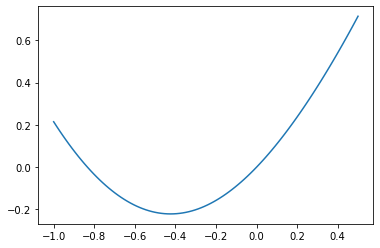

In [ ]:
x = np.linspace(-1, 0.5, 100)
y = np.arctan(x)+x**2
plt.plot(x, y)


Начнём с простого: рассмотрим отрисовку нескольких траекторий синусов при помощи matplotlib и улучшим её с помощью seaborn.

In [ ]:
def sinplot():
    x = np.linspace(-6, 6, 100)
    plt.plot(x, np.sin(x))


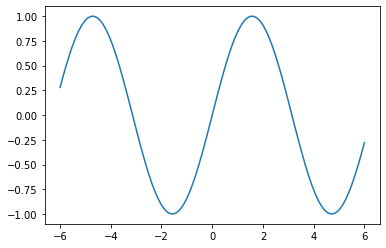

In [ ]:
sinplot()

Вид графиков в разных стилях

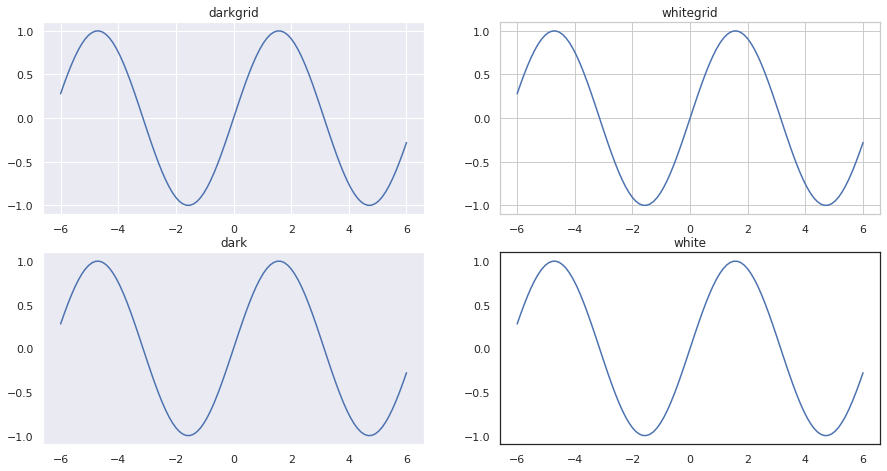

In [ ]:
plt.figure(figsize=(15, 12))
for i, style in enumerate(['darkgrid', 'whitegrid',
                           'dark', 'white']):
    sns.set(style=style)  # Устанавливаем стиль
    plt.subplot(3, 2, i+1)
    sinplot()
    plt.title(style)

#### Ирисы Фишера

Теперь более интересный пример. Загрузим датасет Ирисы Фишера — [классический учебный датасет](https://en.wikipedia.org/wiki/Iris_flower_data_set), который встроен в seaborn. Числовые столбцы отвечают за длину и ширину наружной и внутренней доли околоцветника для трех сортов ириса: setosa, virginica, versicolor.


In [ ]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**displot**

displot  показывает гистограмму  распределения.

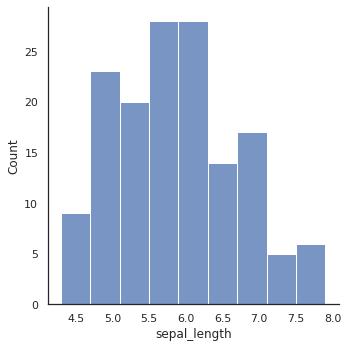

In [ ]:
sns.displot(iris['sepal_length']);

**kdeplot**

kdeplot - график плотности распределения

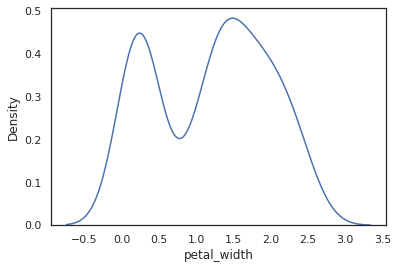

In [ ]:
sns.kdeplot(iris['petal_width'])

Линейный график — **Line Plot**

воспользуемся функцией lineplot с набором данных и столбцами, представляющими оси x и y.

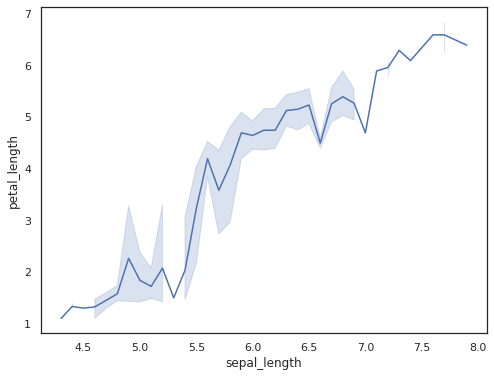

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=iris, x="sepal_length", y="petal_length")

 PairGrid

Сетка графиков для визуализации попарных отношений в данных.

`class sns.PairGrid(data, hue=None, hue_order=None, palette=None, hue_kws=None, vars=None, x_vars=None, y_vars=None, diag_sharey=True, size=2.5, aspect=1, despine=True, dropna=True)`

* `data` &mdash; данные;
* `hue` &mdash; категории, которые будут закрашиваться в разные цвета;
* `palette` &mdash; цветовая схема, может быть задана в виде словаря цветов;
* `height` &mdash; высота каждой грани (в дюймах).

Возвращает объект, у которого доступны перечисленные ниже функции. В эти функции нужно передать функцию `func`, с помощью которой будет построен график по паре переменных (или по одной на диагонали), а так же параметры этой функции.


-------------------

Визуализируем данные об ирисах Фишера.
* на диагонали расположим одномерные ядерные оценки плотности;
* под диагональю &mdash; двумерные;
* над диагональю изобразим сами точки.

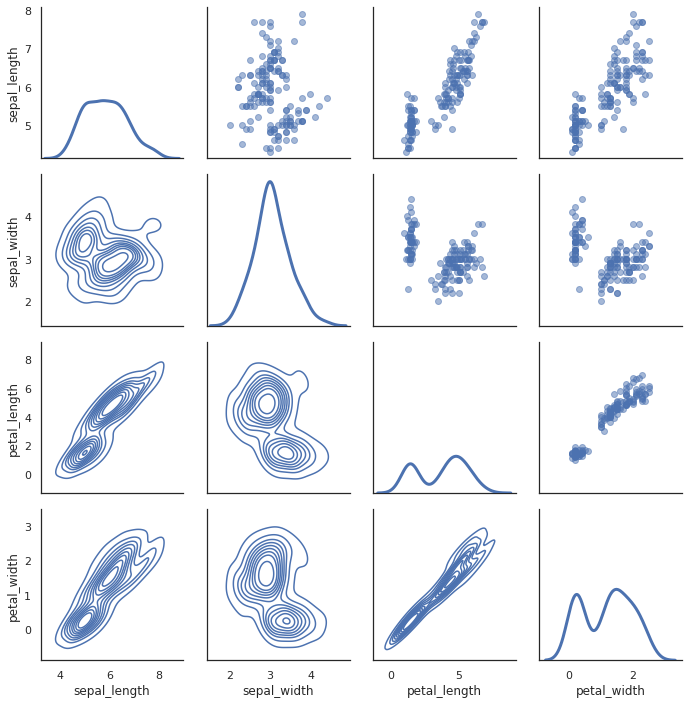

In [ ]:
g = sns.PairGrid(iris)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter, alpha=0.5)
g.map_diag(sns.kdeplot, lw=3);

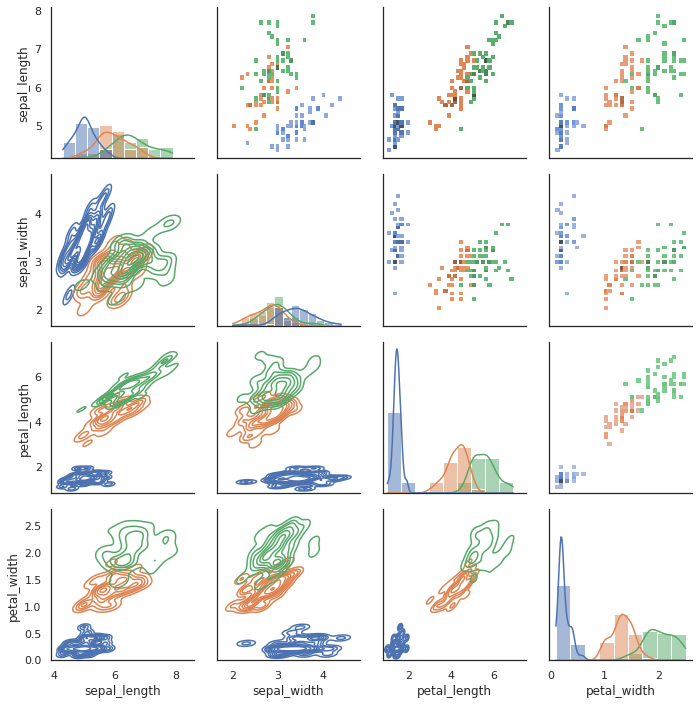

In [ ]:
g = sns.PairGrid(iris, hue="species")
g.map_upper(sns.histplot,bins=40)
g.map_lower(sns.kdeplot, bw_adjust=0.7)
g.map_diag(sns.histplot, kde=True);

**Heatmap**

Визуализирует двумерную таблицу в виде тепловой карты.

sns.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)

data — 2D-данные;

vmin и vmax — минимальное и максимальное значения цветов;

cmap — цветовая схема;

annot — в какие ячейки записывать данные;

fmt — формат записи данных

linewidths — ширина линий между ячейками;

linecolor — цвет линий между ячейками;

cbar — рисовать ли colorbar.

Типичное применение — визуализация корреляции между признаками.

In [ ]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


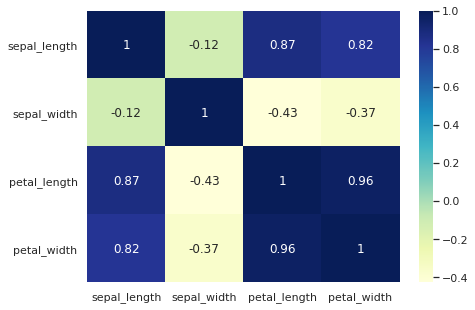

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(iris.corr(), annot=True,  cmap="YlGnBu")

**3d графики с matplotlib**

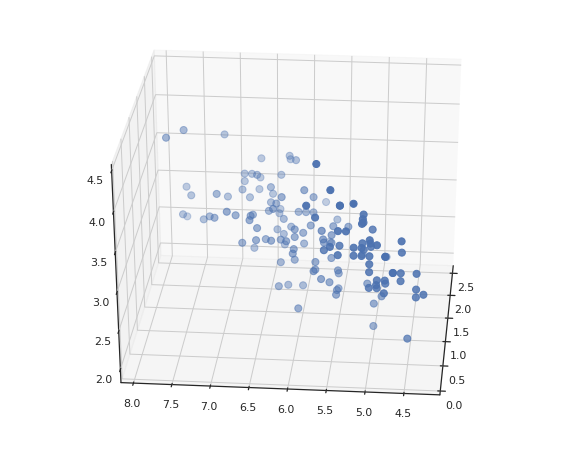

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris['petal_width'], iris['sepal_length'], iris['sepal_width'],    s=50)
ax.view_init(30, 185)
plt.show()

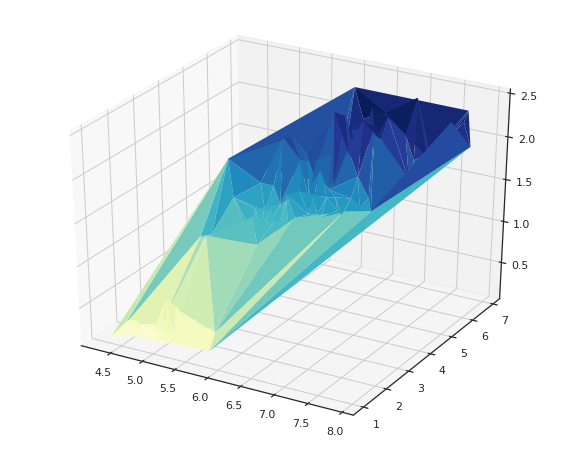

In [ ]:
# Make the plot
fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')
ax.plot_trisurf(iris['sepal_length'], iris['petal_length'], iris['petal_width'], cmap="YlGnBu", linewidth=0.01)
plt.show()

**Визуализация категориальных данных**

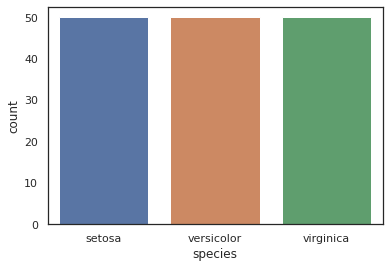

In [ ]:
sns.countplot(x='species', data=iris);

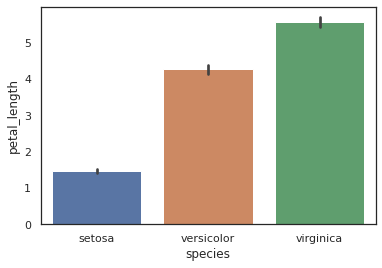

In [ ]:
sns.barplot(x='species', y='petal_length', data=iris);

-----


Больше примеров https://seaborn.pydata.org/examples/ и [https://python-graph-gallery.com/](https://python-graph-gallery.com/)